# HW_1
Тожимухаммедов Асадбек \\
Вариант: 1

----

In [ ]:
# Импорты
import numpy as np
import math
import matplotlib.pyplot as plt

##  №$\textbf{1.*1}$

\begin{align*}
  & f'(x) \approx af(x+h) + bf(x) + cf(x-h) + df(x-2h), \\
  & f(x)=1/x, \\
  & x_{0} = 2 \\
\end{align*}


$\textbf{a)}$

* Разложим в РТ:
  \begin{align*}
    & f'(x) \approx a \left(f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f^{(4)}(x) + O(h^5)\right) + \\
    & b \left( f(x) \right) + \\
    & c \left( f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f^{(4)}(x) + O(h^5) \right) + \\
    & d \left( f(x) - 2hf'(x) + 2h^2f''(x) - \frac{4h^3}{3}f'''(x) + \frac{16h^4}{24}f^{(4)}(x) + O(h^5) \right).
  \end{align*}

* Соберем все коэффициенты при $ ( f(x) ), ( f'(x) ), ( f''(x) ), ( f'''(x) ) и ( f^{(4)}(x) ) $.

* Выпишем систему уравнений, коэф при $( f'(x) )$ должен равняться 1, остальные 0.
  \begin{align*}
    & a + b + c + d = 0 \\
    & a - c - 2d = \frac{1}{h} \\
    & \frac{a}{2} + \frac{c}{2} + 2d = 0 \\
    & \frac{a}{6} - \frac{c}{6} - \frac{4d}{3} = 0 \\
  \end{align*}

* Получаем:
  $ a = \frac{1}{3h}, b = \frac{1}{2h}, c = -\frac{1}{h}, d = \frac{1}{6h} $

  \begin{align*}
    & f'(x) \approx \frac{1}{6h}\left(2f(x+h) + 3f(x) - 6f(x-h) + f(x-2h) \right)
  \end{align*}

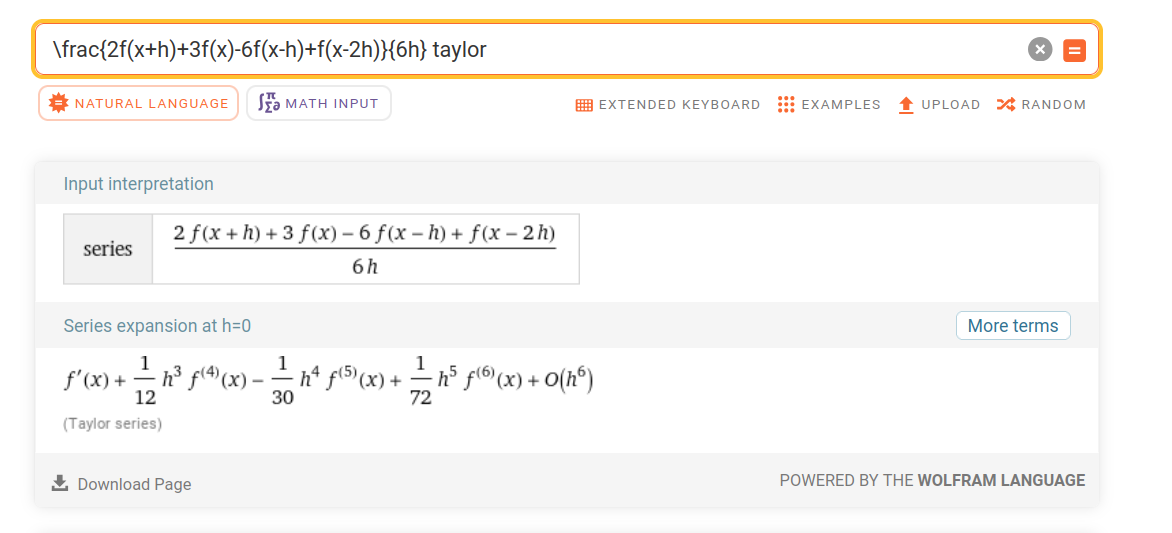

* Видим что, коэф при 4-ой производной не занулился $\Rightarrow$ максимальный порядок аппроксимации: 3. \\

* Ошибка:
  \begin{align*}
    & \left| err1 \right| = \left| {f'(x)-f'(x)+\frac{h^{3}f^{(4)}(x)}{12}}\right| \leq \frac{M_1h^{3}}{12}, \\
    & M_1 = max \left| {f^{(4)}{(θ)}} \right|, \ θ \in [x - h, x + h]
  \end{align*}

$\textbf{b)}$

* $\sqsupset $ Вычисление функций происходит с погрешностью $\textbf{ϵ}$ \\
  Тогда машинная ошибка:
  \begin{align*}
    & err2 = \left| \frac{2}{6h}ϵf^*(x+h) + \frac{3}{6h}ϵf^*(x) - \frac{1}{h}ϵf^*(x-h) + \frac{1}{6h}ϵf^*(x-2h) \right| \leq \frac{2ϵM_2}{h}, \\
    & M_2 = max \left| f(θ) \right|, \ θ \in [x - h, x + h]
  \end{align*}

* $\textbf{Итоговая ошибка:}$
  \begin{align*}
    & \left| err \right| = \left| err1 \right| + \left| err2 \right| \leq \frac{M_1h^{3}}{12} + \frac{2ϵM_2}{h}, \\
    & ϵ \ можно \ играничить \ ϵ_m
  \end{align*}

* Для поиска оптимального h, нужно минимизировать err: \\
  (На семинаре в качестве err просто взяли верхнюю оценку)
  \begin{align*}
    & \frac{M_1h^2}{4} - \frac{2ϵM_2}{h^2} = 0 \\
    & h_{опт} = \left( \frac{8ϵM_2}{M_1} \right)^{\frac{1}{4}} \\
  \end{align*}

* $\textbf{Тогда ошибка диффиринцирования:}$
  \begin{align*}
    err(h_{опт}) &= \frac{M_1}{12} \left( \frac{8ϵM_2}{M_1} \right)^{\frac{3}{4}} + \frac{2ϵM_2}{\left( \frac{8ϵM_2}{M_1} \right)^{\frac{1}{4}}} \\
    &= \frac{1}{3} \left( 8^3ϵ^3M_2^3M_1 \right)^{\frac{1}{4}}
  \end{align*}



$\textbf{с)}$


* Посчитаем примерное значение для оптимального шага:
  \begin{align*}
    & \epsilon \leq \epsilon_m ≈ 10^{-16} \\
    & так \ как \ ( \frac{1}{x} ) ^ {(4)} = \frac{24}{x^{5}}, \\
    & тогда \ оценим \ M_1 = \ max |f^{(4)}(x)| \ в \ окресности \  x_0=2 \ еденицей, \\
    & оценим \ M_2 = \ max |\frac{1}{x}| \ в \ окресности \ x_0 = 2 \ еденицей \\
    & Получаем \ h_{opt} ≈ 1.7 * 10^{-4}
  \end{align*}

* Для одинарной точности аналогично($ ϵ_m ≈ 10^{-7} $):
  $$ h_{opt} ≈ 3 * 10^{-2} $$

In [ ]:
# наш метод вычисления производной
def f_derivative_double_prec(x, h: float) -> float:
  return (1 / (6 * h)) * (2 / ( x + h ) + 3 / x - 6/(x - h) + 1/(x - 2 * h))

def f_derivative_single_prec(x, h: np.float32) -> np.float32:
  return (1 / (6 * h)) * (2 / ( x + h ) + 3 / x - 6/(x - h) + 1/(x - 2 * h))


def main():
	# примерное значение оптимального шага
	h_opt_double_prec = 1.7 * 10**(-4)
	h_opt_single_prec = np.float32(3 * 10**(-2))

	print("Вычисленное значение(double precision):")
	print(f_derivative_double_prec(2.0, h_opt_double_prec))

	print("Вычисленное значение(single precision):")
	print(f_derivative_single_prec(np.float32(2.0), h_opt_single_prec))

	print("\nНастоящее значение:")
	print(-1 / (2.0 * 2.0))

if __name__ == "__main__":
  main()

Вычисленное значение(double precision):
-0.2499999999996786
Вычисленное значение(single precision):
-0.24999794460867775

Настоящее значение:
-0.25


* Получили значения близкие к реальному. Как и ожидалось double precision дал более точный результат!

$\textbf{d)}$ Теоретическая ошибка. Из пункта b:
  \begin{align*}
    & \left| err \right| =  \frac{h^{3}}{12} + \frac{2ϵ_m}{h}, \\
    & M_1,M_2 - оценили \ еденицей, а \ ϵ - ϵ_m.
  \end{align*}

<ipython-input-6-4822fe3885d7>:37: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.loglog()


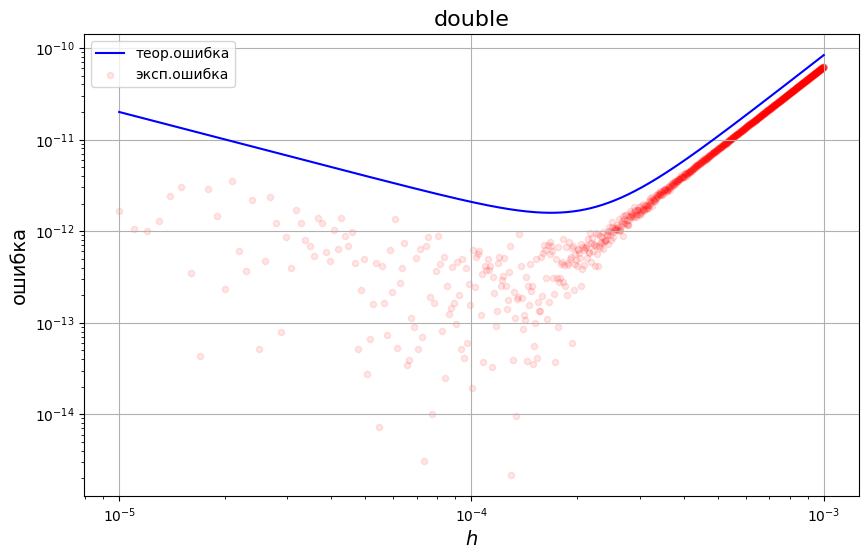

<ipython-input-6-4822fe3885d7>:65: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.loglog()


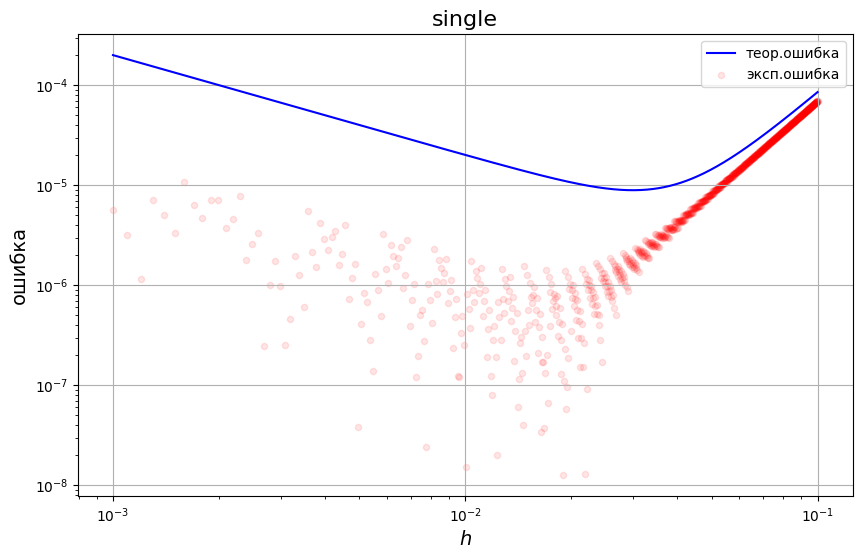

In [ ]:
# функция вычисляющая теор. ошибку
def theor_err(h, eps: float) -> float:
  return (h**3) / 12 + (2 * eps) / h

# реальная производная
def f_derivative_double_prec_real(x: float) -> float:
  return -1 / (x * x)

def f_derivative_single_prec_real(x: np.float32) -> np.float32:
  return -1 / (x * x)

# решение для двойной точности
def double_prec(l, r: float):
  eps_m_double_prec = 10**(-16)

  # создаём список значений для шага
  h_value_list = np.linspace(l, r, 1000)
  # вычисляем теор ошибку
  theor_err_value_list = [theor_err(h, eps_m_double_prec) for h in h_value_list]

  exp_err_value_list = [abs(f_derivative_double_prec_real(2.0) - f_derivative_double_prec(2.0, h)) for h in h_value_list]

  # построение графика
  plt.figure(figsize=(10, 6))
  plt.plot(h_value_list, theor_err_value_list, label=r'теор.ошибка', color='b')
  plt.scatter(h_value_list, exp_err_value_list, label=r'эксп.ошибка', color='r', s=20, alpha=0.1)

  # настройка графика
  plt.yscale('symlog')
  #plt.ylim(10**(-6), 10**(2))
  #plt.xlim(10**(-6), 10**(1))
  plt.xlabel(r'$h$', fontsize=14)
  plt.ylabel(r'ошибка', fontsize=14)
  plt.title(r'double', fontsize=16)
  plt.grid(True)
  plt.legend()
  plt.loglog()
  plt.show()

# решение для одинарной точности
def single_prec(l, r: float):
  eps_m_single_prec = 10**(-7)

  # создаём список значений для шага
  h_value_list = np.linspace(l, r, 1000, dtype=np.float32)
  # вычисляем теор ошибку
  theor_err_value_list = [theor_err(h, eps_m_single_prec) for h in h_value_list]

  exp_err_value_list = [abs(f_derivative_single_prec_real(np.float32(2.0)) - f_derivative_single_prec(np.float32(2.0), h)) for h in h_value_list]

  # построение графика
  plt.figure(figsize=(10, 6))
  plt.plot(h_value_list, theor_err_value_list, label=r'теор.ошибка', color='b')
  plt.scatter(h_value_list, exp_err_value_list, label=r'эксп.ошибка', color='r', s=20, alpha=0.1)

  # настройка графика
  plt.yscale('symlog')
  #plt.ylim(10**(-6), 10**(2))
  #plt.xlim(10**(-4), 10**(1))
  plt.xlabel(r'$h$', fontsize=14)
  plt.ylabel(r'ошибка', fontsize=14)
  plt.title(r'single', fontsize=16)
  plt.grid(True)
  plt.legend()
  plt.loglog()
  plt.show()


def main():
  double_prec(10**(-5), 10**(-3))
  single_prec(10**(-3), 10**(-1))

if __name__ == "__main__":
  main()

* $\textbf{Вывод:}$ \\
  При больших h теор.ошибка улетает т.к. побеждает слагаемое с h^3. \\
  В нуле улетает, т.к побеждает слагаемое с 1/h. \\
  Эксп.ошибка больше только на отрезке (1,3).

	UPD: Свел все к двум графикам. \\
	Видно, что экспериментальная ошибка меньше теоретической, так и должно быть т.к. график экспериментальной ошибки это верхняя оценка на ошибку. \\
  Также видно, что при h_{опт}, ошибка примерно стремится к  минимуму.


##  №$\textbf{I.8.17.}$



\begin{align*}
  & S = \{ \pm b_0.b_1b_2 * 2^{\pm a}\} \\
  & a, b_1, b_2 \in \{0, 1\} \\
  & если \ a = b_1 = b_2 = 0, то \ b_0 \in \{0,1\}, \\
  & иначе \ b_0 = 1 \\
\end{align*}


* Вид чисел:
  * Знак: $ \pm $
  * Экспонента: $ 2^{\pm a} $
  * Мантисса: $ b_0.b_1b_2 $

* Рассмотрим случай: $ a = b_1 = b_2 = 0 $
    \begin{align*}
      & b_0 \in \{ 0,1 \} \\
      & Мантисса: \{ \pm 1, 0 \} \\
      & Экспонента: 1 \\
      & \textbf{Итог:} \{\pm1, 0\}
    \end{align*}

* Рассмотрим $ a = 0 $ :
    \begin{align*}
      & \pm 1.01 → \pm 1.25 \\
      & \pm 1.10 → \pm 1.5 \\
      & \pm 1.11 → \pm 1.75 \\
    \end{align*}

* Рассмотрим $ a = 1 $, т.е домножение на 2 :
    \begin{align*}
      & \pm 1.00 → \pm 2 \\
      & \pm 1.01 → \pm 2.5 \\
      & \pm 1.10 → \pm 3 \\
      & \pm 1.11 → \pm 3.5 \\
    \end{align*}

* Рассмотрим: $ a = -1 $, т.е деление на 2 :
    \begin{align*}
      & \pm 1.00 → \pm 0.5 \\
      & \pm 1.01 → \pm 0.625 \\
      & \pm 1.10 → \pm 0.75 \\
      & \pm 1.11 → \pm 0.875 \\
    \end{align*}

* $ \textbf{Всего чисел:} \ 25$

* $ \textbf{Максимальное по модулю число есть OFL:} \ 3.5 $

* $ \textbf{Минимальное по модулю число есть UFL:} \ 0.5 $

* $ \textbf{Найдем ϵ машинное} $:
    \begin{align*}
      & \epsilon_m = (1.25 - 1) / 2 = 0.125, \\
      & т.к. хотим \ 1 + \epsilon_m = 1
    \end{align*}


##  №$\textbf{I.9.1.}$

* Напишем программу

In [ ]:
# Реализация экспоненты для 32 битных чисел
def exp_single_precision(x: np.float32) -> np.float32:
  res = np.float32(1.0)
  term = np.float32(1.0)
  i = 1

	# вычисление следующего члена ряда
  while res + term != res:
    term = term * x / i
    res += term
    i += 1

	# шаг на котором мы достигли предела точности
  print("i: ", i)
  return res


def main():
	# множество аргументов
	arg_list = np.array([1.5, 10, 15, 20, 25, -1, -5, -10, -15, -20, -25], dtype=np.float32)

	for arg in arg_list:
		print("arg: ", arg)
		print("val: ", exp_single_precision(arg))
		print("real val: ", math.exp(arg), "\n")

if __name__ == "__main__":
  main()


arg:  1.5
i:  14
val:  4.481689
real val:  4.4816890703380645 

arg:  10.0
i:  33
val:  22026.469
real val:  22026.465794806718 

arg:  15.0
i:  42
val:  3269017.5
real val:  3269017.3724721107 

arg:  20.0
i:  50
val:  485165220.0
real val:  485165195.4097903 

arg:  25.0
i:  57
val:  72004910000.0
real val:  72004899337.38588 

arg:  -1.0
i:  13
val:  0.3678794
real val:  0.36787944117144233 

arg:  -5.0
i:  29
val:  0.0067384234
real val:  0.006737946999085467 

arg:  -10.0
i:  47
val:  -6.256183e-05
real val:  4.5399929762484854e-05 

arg:  -15.0
i:  58
val:  0.02123355
real val:  3.059023205018258e-07 

arg:  -20.0
i:  68
val:  -2.7566755
real val:  2.061153622438558e-09 

arg:  -25.0
i:  78
val:  174.7128
real val:  1.3887943864964021e-11 



* $ \textbf{exp(-20) < 0 :)} $

* $ \textbf{!} $ Вывод локально и в colab'е разный, возможно colab игнорирует single presicion

* Видим, что для больших положительных чисел точность большая, это из-за случается так как у нас больше шагов, так как показатель может дольше бороться с факториалом.
Поэтому при построении графика выкину значения: 10, 15, 20, 25

* Возьму локальную(одну из) реализацию программы и построю график реального значения и вычисленного. Реальное значение буду брать из библиотеки math.

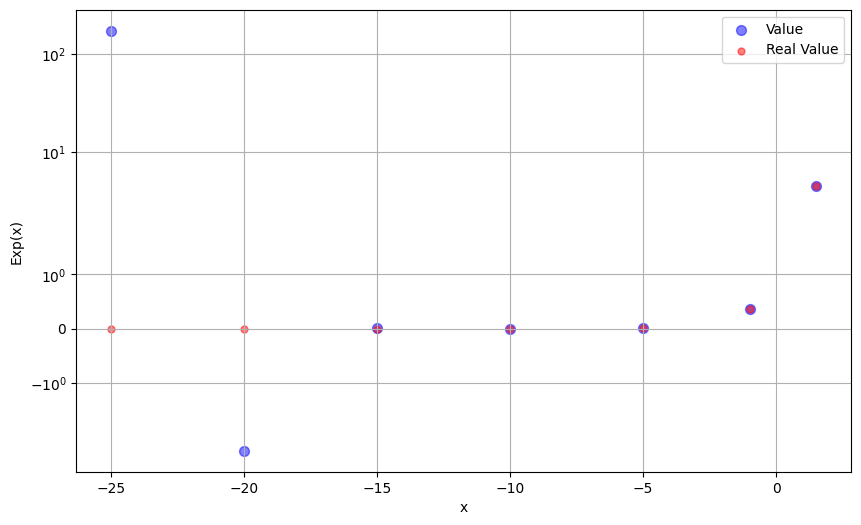

In [ ]:
# зададим список аргументов, реальных значений и вычисленных значений
arg_list = np.array([1.5, -1, -5, -10, -15, -20, -25], dtype=np.float32)

value_list = np.array([4.481689, 0.3678794, 0.0067384234, -6.256183e-05, 0.02123355, -2.7566755, 174.7128], dtype=np.float32)

real_value_list = [4.4816890703380645, 0.36787944117144233, 0.006737946999085467, 4.5399929762484854e-05, 3.059023205018258e-07, 2.061153622438558e-09, 1.3887943864964021e-11]

# строим график
# зададим прозрачность и размеры точек, чтобы различать при наложении точек
plt.figure(figsize=(10, 6))
plt.scatter(arg_list, value_list, color='b', label='Value', s=50, alpha=0.5)
plt.scatter(arg_list, real_value_list, color='r', label='Real Value', s=25, alpha=0.5)

# настраиваем график
# построим все в логарифмическом масштабе
plt.yscale('symlog')
plt.xlabel('x')
plt.ylabel('Exp(x)')
plt.legend()
plt.grid(True)

# отображаем график
plt.show()


* $ \textbf{Вывод:} $ видим, что при увеличении модуля аргумента(отрицательный) вычисляемое значение ведет себя странно. Например, $ exp(-20) < 0, exp(-25) > exp(-15).$ Так как при отрицательном аргументе мы начинаем работать с маленькими числами ($ exp(x) → 0, при \ x → -\infty$) и быстро достигаем $ \epsilon_m $, поэтому мы получаем такое поведение.

* UPD: \\
  Проблема заключается в том, что при x < 0, мы работаем с знакочередующимся рядом, также у нас сетка не равномерная, чем больше модуль числа, тем больше растояние между числами, которые могут быть представлены в компьютере. \\
  Так как в компьютере плохо вычисляется сумма большого и маленького числа, т.к. ряд знакочередующийся мы можем получать маленькие по модулю числа, а функция $ f(n) = \frac{x^n}{n!} $ имеет максимум. т.е мы можем получить сумму большого и маленького по модулям чисел.
  Как оценить погрешность не смог придумать.

* UPD(2): Оценим погрешность.
  $$ e^x = \sum_{n=0}^{∞} \frac{x^n}{n!} $$
  Пусть x вычисляется с погрешностью: $ x(1+\epsilon_m). $ \\
  Тогда: \\
  \begin{align*}
    δ &= | e^{-y} - \sum_{n=0}^{∞} \frac{(-1)^ny^n(1+ϵ)^n}{n!} | = \\
      &≈ | e^{-y} - \sum_{n=0}^{∞} \frac{(-1)^ny^n(1+nϵ)}{n!} | = \\
      &= | e^{-y} - e^{-y} - \sum_{n=0}^{∞} \frac{(-1)^ny^nnϵ}{n!} | = \\
      &= | ϵ\sum_{n=0}^{∞} \frac{(-1)^ny^nn}{n!} | \le \\
      &\le ϵ\sum_{n=0}^{∞} | \frac{(-1)^ny^nn}{n!} | = \\
      &= ϵ\sum_{n=0}^{∞} | \frac{y^nn}{n!} | = \epsilon ye^y
  \end{align*}


* Попробуем решить эту проблему:
  \begin{align*}
    & Знаем, что \ для \ положительных \ x, значение \ вычисляется \ достаточно \ точно.\\
    & Вычислим \ exp(x), \ после \ возьмем \ 1/exp(x).
  \end{align*}


In [ ]:
def main():
	# множество аргументов
	arg_list = np.array([-20, -25, -50, -75], dtype=np.float32)
  # значение где мы хорошо считаем экспоненту
	base = np.float32(-1)

	for arg in arg_list:
		print("arg: ", arg)
		y = arg / base

		val = 1 / exp_single_precision(y)
		real_val = math.exp(arg)
		print("val: ", val)
		print("real val: ", real_val, "\n")

		# UPD: посмотрим на относительную ошибку
		print("относ. ошибка: ", abs(val - real_val) / real_val, "\n")

if __name__ == "__main__":
  main()


arg:  -20.0
i:  50
val:  2.0611535e-09
real val:  2.061153622438558e-09 

относ. ошибка:  1.0772831e-07 

arg:  -25.0
i:  57
val:  1.3887942e-11
real val:  1.3887943864964021e-11 

относ. ошибка:  1.249086e-07 

arg:  -50.0
i:  93
val:  1.9287503e-22
real val:  1.9287498479639178e-22 

относ. ошибка:  1.9632054e-07 

arg:  -75.0
i:  126
val:  2.6786374e-33
real val:  2.6786369618080778e-33 

относ. ошибка:  1.3713765e-07 



* $ \textbf{Вывод:} $ свели задачу к предыдущей, получили относительную ошибку порядка $ ϵ_m $ для соответсвующей точности.